Data Formatting

In [1]:
#Importing Req libraries
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the CSV File

df = pd.read_csv('ipl_dataset.csv')

In [3]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
df.count()

mid               76014
date              76014
venue             76014
bat_team          76014
bowl_team         76014
batsman           76014
bowler            76014
runs              76014
wickets           76014
overs             76014
runs_last_5       76014
wickets_last_5    76014
striker           76014
non-striker       76014
total             76014
dtype: int64

Data Cleaning

In [5]:
#Remove unwanted attributes
remove_columns = ['mid','batsman','bowler','striker','non-striker']
df.drop(labels = remove_columns, axis =1, inplace=True)

Data Analysis

Team Names

In [6]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

Venue Names

In [7]:
df['count'] = 1

In [8]:
df['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

Most Used Stadiums

In [9]:
df['count'] = 1
all_venues = df.groupby(['venue']).count()['count']

In [10]:
pd.DataFrame(all_venues)

,count
venue,
Barabati Stadium,856
Brabourne Stadium,1380
Buffalo Park,380
De Beers Diamond Oval,368
Dr DY Patil Sports Academy,2088
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,1113
Dubai International Cricket Stadium,868
Eden Gardens,7049
Feroz Shah Kotla,7068


Feature Engineering and Selection

In [11]:
current_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                 'Mumbai Indians', 'Kings XI Punjab',
                 'Royal Challengers Bangalore', 'Delhi Daredevils',
                 'Sunrisers Hyderabad']

In [12]:

current_venues = ['M Chinnaswamy Stadium', 'Eden Gardens', 'Feroz Shah Kotla', 'MA Chidambaram Stadium, Chepauk',
                  'Punjab Cricket Association Stadium, Mohali',
                  'Wankhede Stadium', 'Sawai Mansingh Stadium',
                  'Rajiv Gandhi International Stadium, Uppal']

Collecting Current Teams and Current Venues

In [13]:
df = df[(df['bat_team'].isin(current_teams)) & (df['bowl_team'].isin(current_teams))]

df = df[(df['venue'].isin(current_venues))]

df.count()

date              38388
venue             38388
bat_team          38388
bowl_team         38388
runs              38388
wickets           38388
overs             38388
runs_last_5       38388
wickets_last_5    38388
total             38388
count             38388
dtype: int64

Removing first 5 overs data from every match

In [14]:
df = df[df['overs'] >= 5.0]
df.count()

date              28608
venue             28608
bat_team          28608
bowl_team         28608
runs              28608
wickets           28608
overs             28608
runs_last_5       28608
wickets_last_5    28608
total             28608
count             28608
dtype: int64

Data Preprocessing

Here we use Preprocessing to convert features usinf OneHotEncoding and covert string date into datetime object

In [15]:
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [16]:
final_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team', 'venue'])

In [17]:
final_df

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,count,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,...,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,venue_Eden Gardens,venue_Feroz Shah Kotla,venue_M Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk","venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal",venue_Sawai Mansingh Stadium,venue_Wankhede Stadium
32,2008-04-18,61,0,5.1,59,0,222,1,0,0,...,1,0,0,0,1,0,0,0,0,0
33,2008-04-18,61,1,5.2,59,1,222,1,0,0,...,1,0,0,0,1,0,0,0,0,0
34,2008-04-18,61,1,5.3,59,1,222,1,0,0,...,1,0,0,0,1,0,0,0,0,0
35,2008-04-18,61,1,5.4,59,1,222,1,0,0,...,1,0,0,0,1,0,0,0,0,0
36,2008-04-18,61,1,5.5,58,1,222,1,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,106,9,18.1,29,4,107,1,0,0,...,0,0,0,0,1,0,0,0,0,0
75885,2017-05-19,107,9,18.2,29,4,107,1,0,0,...,0,0,0,0,1,0,0,0,0,0
75886,2017-05-19,107,9,18.3,28,4,107,1,0,0,...,0,0,0,0,1,0,0,0,0,0
75887,2017-05-19,107,9,18.4,24,4,107,1,0,0,...,0,0,0,0,1,0,0,0,0,0


Rearranging Columns of our DataSet

In [18]:
#rearranging the columns
final_df = final_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
                     'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
                     'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
                     'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
                     'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
                     'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
                     'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
                     'bowl_team_Royal Challengers Bangalore',
                     'bowl_team_Sunrisers Hyderabad', 'venue_Eden Gardens',
                     'venue_Feroz Shah Kotla', 'venue_M Chinnaswamy Stadium',
                     'venue_MA Chidambaram Stadium, Chepauk', 'venue_Sawai Mansingh Stadium',
                     'venue_Punjab Cricket Association Stadium, Mohali',
                     'venue_Rajiv Gandhi International Stadium, Uppal',
                     'venue_Wankhede Stadium', 'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5',
                     'total']]

final_df.head()

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,venue_Sawai Mansingh Stadium,"venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal",venue_Wankhede Stadium,overs,runs,wickets,runs_last_5,wickets_last_5,total
32,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,5.1,61,0,59,0,222
33,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,5.2,61,1,59,1,222
34,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,5.3,61,1,59,1,222
35,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,5.4,61,1,59,1,222
36,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,5.5,61,1,58,1,222


Dividing the Data into Train and Test

In [19]:
X_train = final_df.drop(labels='total', axis=1)[final_df['date'].dt.year <= 2016]
X_test = final_df.drop(labels='total', axis=1)[final_df['date'].dt.year >= 2017]

y_train = final_df[final_df['date'].dt.year <= 2016]['total'].values
y_test = final_df[final_df['date'].dt.year>=2017]['total'].values

Removing 'date' column

In [20]:
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

Compare Multiple Algorithms & Perform Hyperparameter Tuning

Lasso Regression Model

GridSearchCV is used for hyperparameter tuning

In [21]:
#Installed sklearn package req for training and testing of data

#pip install sklearn

In [22]:
#Importing required dependencies

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [23]:
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8,
                        1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40]} #10^-15, 10^-10, ..., 30, 40
lasso_regressor = GridSearchCV(
    lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

In [ ]:
prediction = lasso_regressor.predict(X_test)

In [ ]:
import sklearn.metrics as metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


MAE: 14.331861445372011
MSE: 353.8014934227635
RMSE: 18.80961172971849


c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

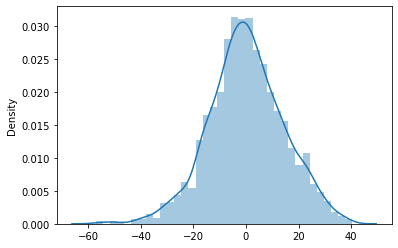

In [ ]:
sns.distplot(y_test-prediction)

Random Forest Regression Model

RandomizedSearchCV for hyperparamter tuning

In [ ]:
#Importing required dependencies

from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Importing req dependency and making the model

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)

In [ ]:
from pprint import pprint
# Look at parameters used by our current forest

print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=800, num=4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']

In [ ]:
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 60, num=6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

In [ ]:
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)  

{'n_estimators': [200, 400, 600, 800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                               n_iter=20, cv=2, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
rf_random.fit(X_train, y_train)


Fitting 2 folds for each of 20 candidates, totalling 40 fits


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': True}

In [ ]:
prediction = rf_random.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 14.331861445372011
MSE: 353.8014934227635
RMSE: 18.80961172971849


c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

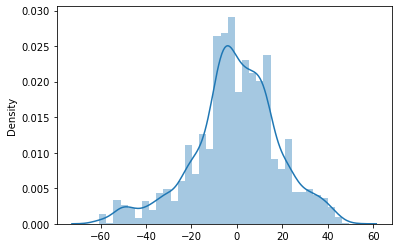

In [ ]:
sns.distplot(y_test-prediction)

Deployment

In [ ]:
# Creating a pickle file for the classifier
filename = 'Batting-score-LassoReg-model.pkl'
pickle.dump(lasso_regressor, open(filename, 'wb'))